<a href="https://colab.research.google.com/github/Hyeok-Jun-Yoon/AI_Plus/blob/main/%EC%8B%AC%ED%99%94%EA%B3%BC%EC%A0%9C_1%EC%A3%BC%EC%B0%A8_AI_2%EA%B8%B0_%EC%9C%A4%ED%98%81%EC%A4%80_%EC%A0%95%EA%B7%9C%ED%99%94%EC%95%88%ED%95%9C%EB%B2%84%EC%A0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [심화과제] CIFAR10 분류(classification) 모델 구현

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

## 1.CIFAR10 DataSet Load

In [3]:
#[MY CODE] CIFAR10 Trin data set
transform = transforms.ToTensor()

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

100%|██████████| 170M/170M [00:13<00:00, 13.0MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [4]:
#[MY CODE] CIFAR10 test data set
testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

Files already downloaded and verified


In [5]:
#[MY CODE] batch_size=256 으로 trainloader 와 testloader 선언
batch_size = 256

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

In [6]:
# [MY CODE] shape 확인
import matplotlib.pyplot as plt
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape, labels.shape)

torch.Size([256, 3, 32, 32]) torch.Size([256])


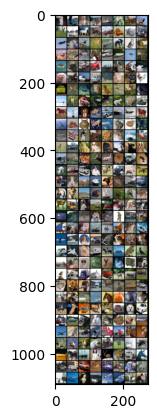

In [33]:
import numpy as np
def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

## 2.  Activation 함수를 `nn.LeakyReLU`로 변경

In [7]:
from torch import nn

class Model(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()
    # 층 정의, 선형 변환을 수행
    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    # [MY CODE] LeakyReLu 함수 사용
    self.act = nn.LeakyReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1) #1D벡터로 평탄화하여 변환
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.layer3(x)

    return x

## 3. SGD와 Adam을 학습시킨 후 각각의 epoch에 대한 train 정확도를 plot

In [8]:
def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return (acc / cnt)*100 # [MY CODE] 백분율로 표시

In [21]:
import numpy as np
def plot_acc(case1_list, case2_list, label1='case1_list', label2='case2_list'):
  x = np.arange(len(case1_list))

  plt.plot(x, case1_list, label=label1)
  plt.plot(x, case2_list, label=label2)
  plt.legend()
  plt.show()

In [10]:
from torch.optim import Adam #(Adaptive Moment Estimation)
lr = 0.001
# [MY CODE] shape에 따른 input_dim
model = Model(32 * 32 * 3, 1024)

model = model.to('cuda')

# [MY CODE] ADAM를 이용한 모델 optimizer
optimizer_ADAM = Adam(model.parameters(), lr=lr)

loss_function = nn.CrossEntropyLoss()

In [11]:
n_epochs = 50
train_Adam = []

for epoch in range(n_epochs):
    # 학습
    model.train()

    for data in trainloader:
        model.zero_grad()
        inputs, labels = data
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        preds = model(inputs)
        loss = loss_function(preds, labels)
        loss.backward()
        optimizer_ADAM.step()

    # [MY CODE] 학습 정확도 계산
    train_Adam_acc = accuracy(model, trainloader)
    train_Adam.append(train_Adam_acc)

    # [LOG] 학습 정확도 epoch 마다
    print(f"Epoch [{epoch+1}/{n_epochs}], Train Adam: {train_Adam_acc:.2f}%")

Epoch [1/50], Train Adam: 37.56%
Epoch [2/50], Train Adam: 42.33%
Epoch [3/50], Train Adam: 42.39%
Epoch [4/50], Train Adam: 47.72%
Epoch [5/50], Train Adam: 49.64%
Epoch [6/50], Train Adam: 50.72%
Epoch [7/50], Train Adam: 50.98%
Epoch [8/50], Train Adam: 54.01%
Epoch [9/50], Train Adam: 54.30%
Epoch [10/50], Train Adam: 55.06%
Epoch [11/50], Train Adam: 54.63%
Epoch [12/50], Train Adam: 56.64%
Epoch [13/50], Train Adam: 58.17%
Epoch [14/50], Train Adam: 59.43%
Epoch [15/50], Train Adam: 60.98%
Epoch [16/50], Train Adam: 63.27%
Epoch [17/50], Train Adam: 63.38%
Epoch [18/50], Train Adam: 64.17%
Epoch [19/50], Train Adam: 63.94%
Epoch [20/50], Train Adam: 65.11%
Epoch [21/50], Train Adam: 65.15%
Epoch [22/50], Train Adam: 66.68%
Epoch [23/50], Train Adam: 69.75%
Epoch [24/50], Train Adam: 71.23%
Epoch [25/50], Train Adam: 70.50%
Epoch [26/50], Train Adam: 68.18%
Epoch [27/50], Train Adam: 69.85%
Epoch [28/50], Train Adam: 71.35%
Epoch [29/50], Train Adam: 73.96%
Epoch [30/50], Train Ad

In [13]:
from torch.optim import SGD #(Stochastic Gradient Descent)
lr = 0.001

# [MY CODE] shape에 따른 input_dim
model = Model(32 * 32 * 3, 1024)

model = model.to('cuda')

# [MY CODE] SGD를 이용한 모델 optimizer
optimizer_SGD = SGD(model.parameters(), lr=lr)

In [14]:
n_epochs = 50
train_SGD = []

for epoch in range(n_epochs):
    # 학습
    model.train()

    for data in trainloader:
        model.zero_grad()
        inputs, labels = data
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        preds = model(inputs)
        loss = loss_function(preds, labels)
        loss.backward()
        optimizer_SGD.step()

    # [MY CODE] 학습 정확도 계산
    train_SGD_acc = accuracy(model, trainloader)
    train_SGD.append(train_SGD_acc)
    # [LOG] 학습 정확도 epoch 마다
    print(f"Epoch [{epoch+1}/{n_epochs}], Train SGD: {train_SGD_acc:.2f}%")

Epoch [1/50], Train SGD: 11.31%
Epoch [2/50], Train SGD: 11.60%
Epoch [3/50], Train SGD: 12.99%
Epoch [4/50], Train SGD: 14.65%
Epoch [5/50], Train SGD: 16.45%
Epoch [6/50], Train SGD: 18.35%
Epoch [7/50], Train SGD: 19.54%
Epoch [8/50], Train SGD: 21.22%
Epoch [9/50], Train SGD: 22.27%
Epoch [10/50], Train SGD: 23.06%
Epoch [11/50], Train SGD: 23.63%
Epoch [12/50], Train SGD: 24.49%
Epoch [13/50], Train SGD: 24.89%
Epoch [14/50], Train SGD: 25.59%
Epoch [15/50], Train SGD: 26.01%
Epoch [16/50], Train SGD: 26.94%
Epoch [17/50], Train SGD: 27.17%
Epoch [18/50], Train SGD: 27.81%
Epoch [19/50], Train SGD: 28.08%
Epoch [20/50], Train SGD: 28.59%
Epoch [21/50], Train SGD: 28.77%
Epoch [22/50], Train SGD: 29.18%
Epoch [23/50], Train SGD: 29.33%
Epoch [24/50], Train SGD: 29.72%
Epoch [25/50], Train SGD: 29.89%
Epoch [26/50], Train SGD: 30.28%
Epoch [27/50], Train SGD: 30.52%
Epoch [28/50], Train SGD: 30.57%
Epoch [29/50], Train SGD: 30.82%
Epoch [30/50], Train SGD: 31.07%
Epoch [31/50], Trai

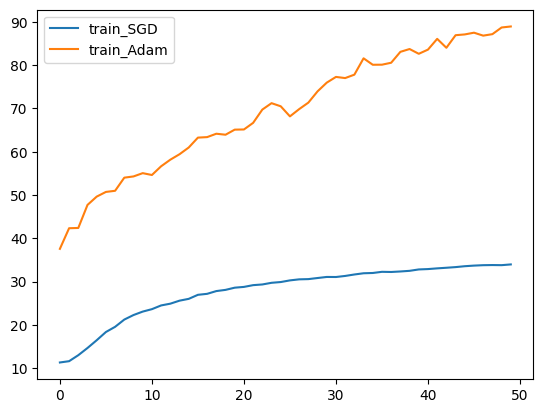

In [16]:
#[MY CODE] SGD,Adam 과의 학습 정확도 plot
plot_acc(train_SGD, train_Adam, label1='train_SGD', label2='train_Adam')

## 4. Leaky ReLU와 Sigmoid 성능 비교

In [17]:
class Model_sigmoid(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()
    # 층 정의, 선형 변환을 수행
    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    # [MY CODE] sigmoid 함수 사용
    self.act = nn.Sigmoid()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1) #1D벡터로 평탄화하여 변환
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.layer3(x)

    return x

In [18]:
lr = 0.001
# [MY CODE] shape에 따른 input_dim
model_sigmoid = Model_sigmoid(32 * 32 * 3, 1024)

model_sigmoid = model_sigmoid.to('cuda')

# [MY CODE] ADAM를 이용한 모델 optimizer
optimizer_ADAM = Adam(model_sigmoid.parameters(), lr=lr)

In [19]:
n_epochs = 50
train_sigmoid = []

for epoch in range(n_epochs):
    # 학습
    model.train()

    for data in trainloader:
        model_sigmoid.zero_grad()
        inputs, labels = data
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        preds = model_sigmoid(inputs)
        loss = loss_function(preds, labels)
        loss.backward()
        optimizer_ADAM.step()

    # [MY CODE] 학습 정확도 계산
    train_sigmoid_acc = accuracy(model_sigmoid, trainloader)
    train_sigmoid.append(train_sigmoid_acc)

    # [LOG] 학습 정확도 epoch 마다
    print(f"Epoch [{epoch+1}/{n_epochs}], Train Sigmoid: {train_sigmoid_acc:.2f}%")

Epoch [1/50], Train Sigmoid: 36.70%
Epoch [2/50], Train Sigmoid: 38.95%
Epoch [3/50], Train Sigmoid: 42.04%
Epoch [4/50], Train Sigmoid: 45.70%
Epoch [5/50], Train Sigmoid: 45.47%
Epoch [6/50], Train Sigmoid: 49.32%
Epoch [7/50], Train Sigmoid: 50.03%
Epoch [8/50], Train Sigmoid: 49.27%
Epoch [9/50], Train Sigmoid: 49.62%
Epoch [10/50], Train Sigmoid: 50.72%
Epoch [11/50], Train Sigmoid: 52.47%
Epoch [12/50], Train Sigmoid: 54.69%
Epoch [13/50], Train Sigmoid: 53.54%
Epoch [14/50], Train Sigmoid: 54.93%
Epoch [15/50], Train Sigmoid: 56.35%
Epoch [16/50], Train Sigmoid: 54.45%
Epoch [17/50], Train Sigmoid: 57.59%
Epoch [18/50], Train Sigmoid: 56.37%
Epoch [19/50], Train Sigmoid: 59.02%
Epoch [20/50], Train Sigmoid: 59.32%
Epoch [21/50], Train Sigmoid: 59.59%
Epoch [22/50], Train Sigmoid: 59.83%
Epoch [23/50], Train Sigmoid: 61.11%
Epoch [24/50], Train Sigmoid: 61.16%
Epoch [25/50], Train Sigmoid: 62.71%
Epoch [26/50], Train Sigmoid: 63.79%
Epoch [27/50], Train Sigmoid: 64.30%
Epoch [28/

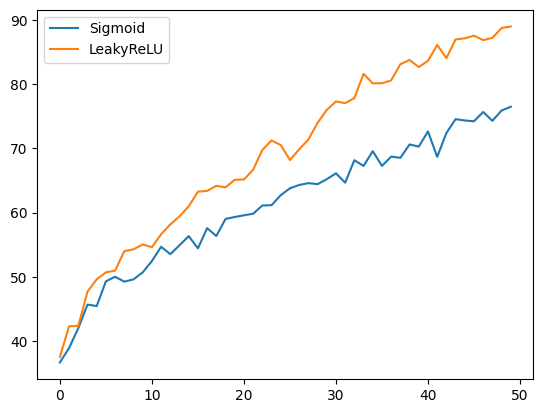

In [22]:
#[MY CODE] Sigmoid 함수와 LeakyReLU 함수 의 학습 정확도 plot
plot_acc(train_sigmoid, train_Adam, label1='Sigmoid', label2='LeakyReLU')

## Dropout을 적용한 이후의 generalization error 확인

In [23]:
class Model_dropout(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()
    # 층 정의, 선형 변환을 수행
    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    # [MY CODE] LeakyReLu 함수 사용
    self.act = nn.LeakyReLU()

    # [MY CODE] Dropout 확률 0.1 선언
    self.dropout = nn.Dropout(0.1)

  def forward(self, x):
    x = torch.flatten(x, start_dim=1) #1D벡터로 평탄화하여 변환
    x = self.dropout(self.act(self.layer1(x))) # [MY CODE] 모든 층 마다 dropout 적용, 마지막 출력은 제외
    x = self.dropout(self.act(self.layer2(x)))
    x = self.layer3(x)

    return x

In [24]:
lr = 0.001
# [MY CODE] shape에 따른 input_dim
model_dropout = Model_dropout(32 * 32 * 3, 1024)

model_dropout = model_dropout.to('cuda')

# [MY CODE] ADAM를 이용한 모델 optimizer
optimizer_ADAM = Adam(model_dropout.parameters(), lr=lr)

In [25]:
n_epochs = 50
train_dropout = []
test_acces=[]

for epoch in range(n_epochs):
    # 학습
    model.train()

    for data in trainloader:
        model_dropout.zero_grad()
        inputs, labels = data
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        preds = model_dropout(inputs)
        loss = loss_function(preds, labels)
        loss.backward()
        optimizer_ADAM.step()

    # [MY CODE] 학습 정확도 계산
    train_dropout_acc = accuracy(model_dropout, trainloader)
    train_dropout.append(train_dropout_acc)

    #테스트
    with torch.no_grad():
      model.eval() #테스트 모델로 전환
      test_acc = accuracy(model_dropout, testloader)
      test_acces.append(test_acc)

    # [LOG] 학습 정확도 epoch 마다
    print(f"Epoch [{epoch+1}/{n_epochs}], Train Dropout: {train_dropout_acc:.2f}%, Test Accuarcy: {test_acc:.2f}%")

Epoch [1/50], Train Dropout: 36.76%, Test Accuarcy: 36.75%
Epoch [2/50], Train Dropout: 40.09%, Test Accuarcy: 39.75%
Epoch [3/50], Train Dropout: 43.69%, Test Accuarcy: 43.06%
Epoch [4/50], Train Dropout: 46.39%, Test Accuarcy: 45.25%
Epoch [5/50], Train Dropout: 47.86%, Test Accuarcy: 46.28%
Epoch [6/50], Train Dropout: 48.17%, Test Accuarcy: 46.04%
Epoch [7/50], Train Dropout: 46.09%, Test Accuarcy: 44.35%
Epoch [8/50], Train Dropout: 50.29%, Test Accuarcy: 47.83%
Epoch [9/50], Train Dropout: 50.61%, Test Accuarcy: 47.98%
Epoch [10/50], Train Dropout: 50.78%, Test Accuarcy: 47.10%
Epoch [11/50], Train Dropout: 52.03%, Test Accuarcy: 48.39%
Epoch [12/50], Train Dropout: 51.48%, Test Accuarcy: 47.76%
Epoch [13/50], Train Dropout: 53.24%, Test Accuarcy: 48.81%
Epoch [14/50], Train Dropout: 55.22%, Test Accuarcy: 50.50%
Epoch [15/50], Train Dropout: 55.45%, Test Accuarcy: 50.00%
Epoch [16/50], Train Dropout: 56.58%, Test Accuarcy: 50.64%
Epoch [17/50], Train Dropout: 55.70%, Test Accuar

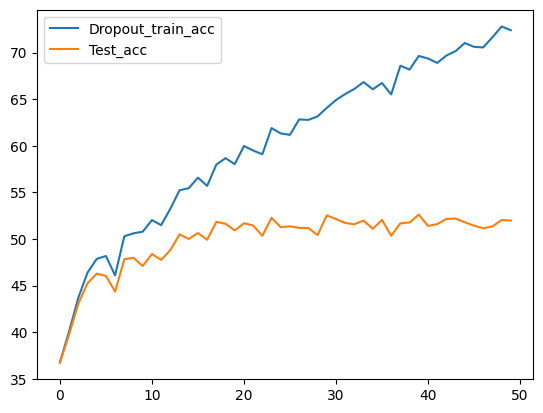

In [26]:
#[MY CODE] Adam optimizer를 가지고 dropout을 적용한 모델을 학습한 후, epoch에 따른 train과 test 정확도를 비교
plot_acc(train_dropout, test_acces, label1='Dropout_train_acc', label2='Test_acc')